# PREDICTING HEART DISEASES USING MACHINE LEARNING

### Basically it is a classification problem, we are going to predict whether the person has heart disease or not

Our data is collected from Kaggale : https://www.kaggle.com/code/cdabakoglu/heart-disease-classifications-machine-learning/data

## Our Data Representations:

age - age in years

sex - (1 = male; 0 = female)

cp - chest pain type

0: Typical angina: chest pain related decrease blood supply to the heart

1: Atypical angina: chest pain not related to heart

2: Non-anginal pain: typically esophageal spasms (non heart related)

3: Asymptomatic: chest pain not showing signs of disease-

trestbps - resting blood pressure (in mm Hg on admission to the hospital) 

anything above 130-140 is typically cause for concern

chol - serum cholestoral in mg/dl

serum = LDL + HDL + .2 * triglycerides

above 200 is cause for concern

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

'>126' mg/dL signals diabetes

restecg - resting electrocardiographic results

0: Nothing to note

1: ST-T Wave abnormality

can range from mild symptoms to severe problems

signals non-normal heart beat

2: Possible or definite left ventricular hypertrophy

Enlarged heart's main pumping chamber

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

slope - the slope of the peak exercise ST segment

0: Upsloping: better heart rate with excercise (uncommon)

1: Flatsloping: minimal change (typical healthy heart)

2: Downslopins: signs of unhealthy heart

ca - number of major vessels (0-3) colored by flourosopy

colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)

thal - thalium stress result

1,3: normal

6: fixed defect: used to be defect but ok now

7: reversable defect: no proper blood movement when excercising

target - have disease or not (1=yes, 0=no) (= the predicted attribute)

## Importing Libraries

In [1]:
#For Data Analysis:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Models for scitlearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#For Modifing the like adding the missing values and tranforming into numerical

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

#For model evalaution:

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

### Here we are going to explore our data and expert in our dataset

In [4]:
df=pd.read_csv("heart_disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [6]:
df["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

By this way we come to know it is a more or less somewhat balanced type, beause the target has equal number of 1's and 0's

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Here every element in form of integer and float, so no need of transformation

In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

There is no misiing element so we don't need to impute anything

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## We will compare our target with other to get to know about the impacts of the heart disease by that column

In [11]:
# Comparing sex with target

df["sex"].value_counts()

1    713
0    312
Name: sex, dtype: int64

In [12]:
pd.crosstab(df["target"],df["sex"])

sex,0,1
target,,
0,86,413
1,226,300


## We infer that 72% of women having the heart disease(3/4)


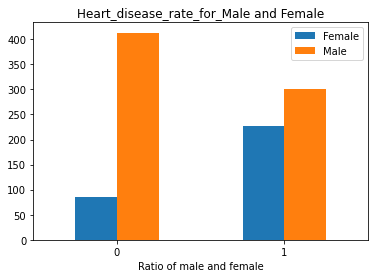

In [13]:
pd.crosstab(df["target"],df["sex"]).plot(kind="bar")
plt.legend(["Female","Male"])
plt.xlabel("Ratio of male and female")
plt.title("Heart_disease_rate_for_Male and Female")
plt.xticks(rotation=0);

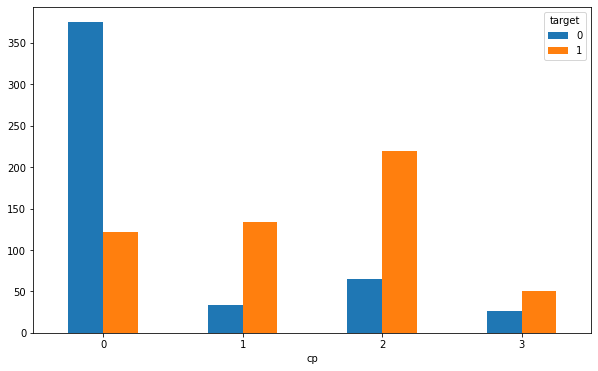

In [14]:
pd.crosstab(df["cp"],df["target"]).plot(kind="bar",figsize=(10,6))
plt.xticks(rotation=0);

In [15]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


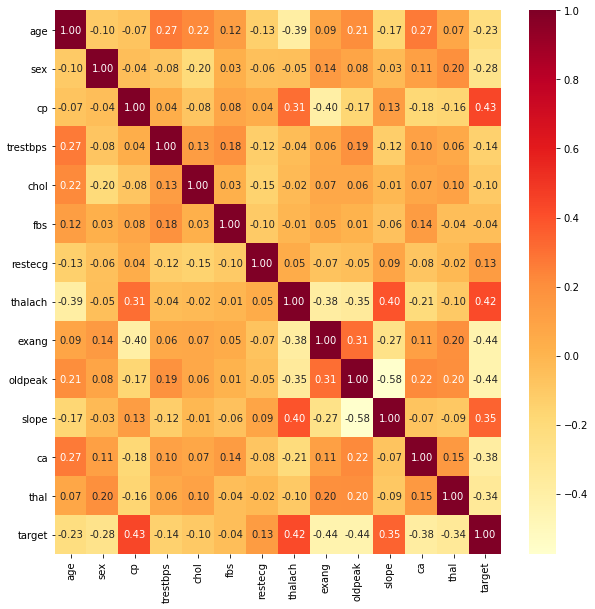

In [16]:
correl = df.corr()
fig,ax=plt.subplots(figsize=(10,10))
ax=sns.heatmap(correl,annot=True,fmt=".2f",cmap="YlOrRd")

## Now We are Going to Build a Machine Learning Model to Predict The case

### We are going to use three models and pick a best one out of it

#### *Logistic Regression
#### *KNeighbor Model
#### *Random Forest Model

In [18]:
#Splitting our data
x=df.drop("target",axis=1)
y=df["target"]

#Spliting train and test data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, x_train,x_test,y_train,y_test):
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [20]:
model_scores = fit_and_score(models=models,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)

model_scores

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.848780487804878,
 'KNN': 0.6829268292682927,
 'Random Forest': 1.0}

Here Logistic Regression performed well but Random Forest gives the 100 percent accuracy which mean it is over trained so we can modify the parameter to check the random forest

<AxesSubplot:>

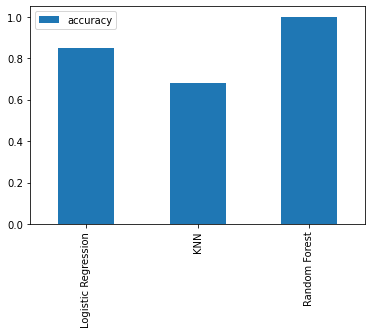

In [21]:
model_compares=pd.DataFrame(model_scores,index=["accuracy"])

model_compares.T.plot(kind="bar")

## Modifying parameter of K neighbour and checking the accaury

In [22]:
# Train and test scores
train_scores=[]
test_scores=[]

n_neighbors = range(1,21)
knn=KNeighborsClassifier()

for i in n_neighbors:
  knn.set_params(n_neighbors=i)

  knn.fit(x_train,y_train)
  
  

  train_scores.append(knn.score(x_train,y_train))
  
  test_scores.append(knn.score(x_test,y_test))

  

In [23]:
cross_val_score(knn,x,y,cv=5)

array([0.68292683, 0.75609756, 0.75609756, 0.67804878, 0.63902439])

In [24]:
max(train_scores)

1.0

In [25]:
max(test_scores)

0.9853658536585366

# Wonderfully We have got an accuracy of 98.5 % percent using KNN Classifier

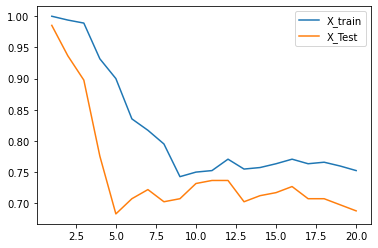

In [26]:
plt.plot(n_neighbors,train_scores,label="X_train")
plt.plot(n_neighbors,test_scores,label="X_Test")
plt.legend()

# We need to tune our LogisticRegression and RandomForestClassifier model 

### Randomized Search for Logistic 

In [27]:
#Hyperparameters of Logistic and RandomForest in grid

Lg_grid={"C":np.logspace(-2,6,20),"solver":["liblinear"]}

rf_grid={"n_estimators":np.arange(10,1000,50),"max_depth":[None,3,5,10],"min_samples_split":np.arange(2,20,2),"min_samples_leaf":np.arange(1,20,2)}

In [28]:

rs_leg=RandomizedSearchCV(LogisticRegression(),param_distributions=Lg_grid,cv=5,n_iter=20,verbose=True)

#Fit the model
rs_leg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-02, 2.63665090e-02, 6.95192796e-02, 1.83298071e-01,
       4.83293024e-01, 1.27427499e+00, 3.35981829e+00, 8.85866790e+00,
       2.33572147e+01, 6.15848211e+01, 1.62377674e+02, 4.28133240e+02,
       1.12883789e+03, 2.97635144e+03, 7.84759970e+03, 2.06913808e+04,
       5.45559478e+04, 1.43844989e+05, 3.79269019e+05, 1.00000000e+06]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [29]:
rs_leg.best_params_

{'solver': 'liblinear', 'C': 0.06951927961775606}

In [31]:
## Tuned Value of Logistic Regression

rs_leg.score(x_test,y_test)

0.848780487804878

## Tuning Random Forest (Randomised Search for Random Forest)

In [32]:
np.random.seed(42)
rs_Ran=RandomizedSearchCV(RandomForestClassifier(),param_distributions=rf_grid,cv=5,n_iter=20,verbose=True)

#Fit the model of Random Forest
rs_Ran.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [33]:
rs_Ran.best_params_

{'n_estimators': 510,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': None}

In [34]:
rs_Ran.score(x_test,y_test)

0.9609756097560975

## For this also we are gaining good accuracy

# => Going to perform Grid Search

In [35]:
np.random.seed(42)
gs_leg=GridSearchCV(LogisticRegression(),param_grid=Lg_grid,cv=5,verbose=True)

#Fit the model
gs_leg.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-02, 2.63665090e-02, 6.95192796e-02, 1.83298071e-01,
       4.83293024e-01, 1.27427499e+00, 3.35981829e+00, 8.85866790e+00,
       2.33572147e+01, 6.15848211e+01, 1.62377674e+02, 4.28133240e+02,
       1.12883789e+03, 2.97635144e+03, 7.84759970e+03, 2.06913808e+04,
       5.45559478e+04, 1.43844989e+05, 3.79269019e+05, 1.00000000e+06]),
                         'solver': ['liblinear']},
             verbose=True)

In [36]:
gs_leg.best_params_

{'C': 0.06951927961775606, 'solver': 'liblinear'}

In [37]:
gs_leg.score(x_test,y_test)

0.848780487804878

In [39]:
rf_grid={"n_estimators":np.arange(300,350,10),"max_depth":[None],"min_samples_split":np.arange(10,15,1),"min_samples_leaf":np.arange(1,6,1)}

In [41]:
np.random.seed(42)
gs_Ran=GridSearchCV(RandomForestClassifier(),param_grid=rf_grid,cv=5,verbose=True)

gs_Ran.fit(x_train,y_train)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None],
                         'min_samples_leaf': array([1, 2, 3, 4, 5]),
                         'min_samples_split': array([10, 11, 12, 13, 14]),
                         'n_estimators': array([300, 310, 320, 330, 340])},
             verbose=True)

In [43]:
gs_Ran.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 340}

In [44]:
gs_Ran.score(x_test,y_test)

0.9707317073170731

## We evaluated the model and get the accuray of 97 percent in Random Forest

### We are having great accuarcy in KNN compared to others

# We need to evaluate the model and calculation the AUC - AREA UNDER CURVE

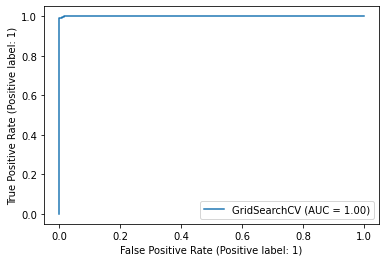

In [45]:
plot_roc_curve(gs_Ran,x,y)

In [46]:
np.array(y_test)

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1], dtype=int64)

In [47]:
y_pred=rs_leg.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1], dtype=int64)

## We need confusion Matrix to test => "Randomised Search Logistic Regression"

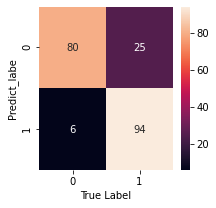

In [48]:
def plot_con_mat(y_test,y_pred):
  fig,ax=plt.subplots(figsize=(3,3))
  ax=sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
  plt.xlabel("True Label")
  plt.ylabel("Predict_labe")

plot_con_mat(y_test,y_pred)

## We need confusion Matrix to test => "KNN"

In [49]:
y_pred_KNN =knn.predict(x_test)
y_pred_KNN

array([1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0], dtype=int64)

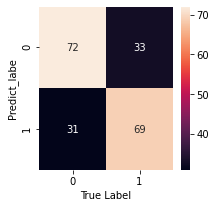

In [50]:
def plot_con_mat(y_test,y_pred_KNN):
  fig,ax=plt.subplots(figsize=(3,3))
  ax=sns.heatmap(confusion_matrix(y_test,y_pred_KNN),annot=True)
  plt.xlabel("True Label")
  plt.ylabel("Predict_labe")

plot_con_mat(y_test,y_pred_KNN)

## We need confusion Matrix to test => "GRID SEARCH RANDOM FOREST"

In [52]:
y_pred_GS_RAN =gs_Ran.predict(x_test)
y_pred_GS_RAN

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1], dtype=int64)

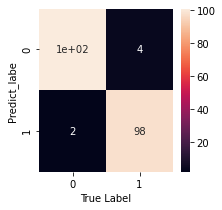

In [53]:
plot_con_mat(y_test,y_pred_GS_RAN)

## Classification Report

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.76      0.84       105
           1       0.79      0.94      0.86       100

    accuracy                           0.85       205
   macro avg       0.86      0.85      0.85       205
weighted avg       0.86      0.85      0.85       205



In [55]:
print(classification_report(y_test,y_pred_KNN))

              precision    recall  f1-score   support

           0       0.70      0.69      0.69       105
           1       0.68      0.69      0.68       100

    accuracy                           0.69       205
   macro avg       0.69      0.69      0.69       205
weighted avg       0.69      0.69      0.69       205



In [56]:
print(classification_report(y_test,y_pred_GS_RAN))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       105
           1       0.96      0.98      0.97       100

    accuracy                           0.97       205
   macro avg       0.97      0.97      0.97       205
weighted avg       0.97      0.97      0.97       205



In [57]:
clf = LogisticRegression(C=0.06951927961775606, solver='liblinear')
clf

LogisticRegression(C=0.06951927961775606, solver='liblinear')

In [59]:
clf.fit(x_train,y_train)

LogisticRegression(C=0.4832930238571752, solver='liblinear')

In [60]:
cv_acc=cross_val_score(clf,x,y,cv=5,scoring="accuracy").mean()

In [61]:
cv_acc=np.mean(cv_acc)
cv_acc

0.8458536585365855

In [62]:
cv_precision=cross_val_score(clf,x,y,cv=5,scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8184966838614592

In [63]:
cv_f1=cross_val_score(clf,x,y,cv=5,scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8569847983722951

In [64]:
cv_recall=cross_val_score(clf,x,y,cv=5,scoring="recall")
cv_recall=np.mean(cv_recall)
cv_recall

0.8993351302785264

### Visualise cross val matric

In [65]:
tot_cross={"cv_acc":cv_acc,"cv_precision":cv_precision,"cv_f1":cv_f1,"cv_recall":cv_recall}
tot_cross=pd.DataFrame(tot_cross,index=[0])

In [66]:
tot_cross

,cv_acc,cv_precision,cv_f1,cv_recall
0,0.845854,0.818497,0.856985,0.899335


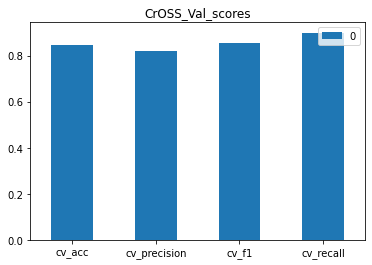

In [67]:
tot_cross.T.plot(kind="bar",title="CrOSS_Val_scores")

plt.xticks(rotation=0);

In [68]:
clf.coef_

array([[ 1.34196484e-04, -1.47878846e+00,  7.87990997e-01,
        -8.51899595e-03, -2.46489070e-03, -2.10863197e-01,
         4.86693793e-01,  2.81111438e-02, -8.92788751e-01,
        -5.94746417e-01,  3.88669304e-01, -6.68816351e-01,
        -8.34047014e-01]])

In [69]:
features_dic = dict(zip(df.columns,list(clf.coef_[0])))
features_dic

{'age': 0.00013419648419492396,
 'sex': -1.4787884626077583,
 'cp': 0.7879909971097956,
 'trestbps': -0.008518995951121506,
 'chol': -0.0024648907016543158,
 'fbs': -0.2108631968825597,
 'restecg': 0.48669379319986694,
 'thalach': 0.028111143797321592,
 'exang': -0.8927887509356633,
 'oldpeak': -0.5947464166045083,
 'slope': 0.388669303525668,
 'ca': -0.6688163512230119,
 'thal': -0.8340470140020312}

## Visualise the feature_dic

In [70]:
feature_vis=pd.DataFrame(features_dic,index=[0])
feature_vis

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.000134,-1.478788,0.787991,-0.008519,-0.002465,-0.210863,0.486694,0.028111,-0.892789,-0.594746,0.388669,-0.668816,-0.834047


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'age'),
  Text(1, 0, 'sex'),
  Text(2, 0, 'cp'),
  Text(3, 0, 'trestbps'),
  Text(4, 0, 'chol'),
  Text(5, 0, 'fbs'),
  Text(6, 0, 'restecg'),
  Text(7, 0, 'thalach'),
  Text(8, 0, 'exang'),
  Text(9, 0, 'oldpeak'),
  Text(10, 0, 'slope'),
  Text(11, 0, 'ca'),
  Text(12, 0, 'thal')])

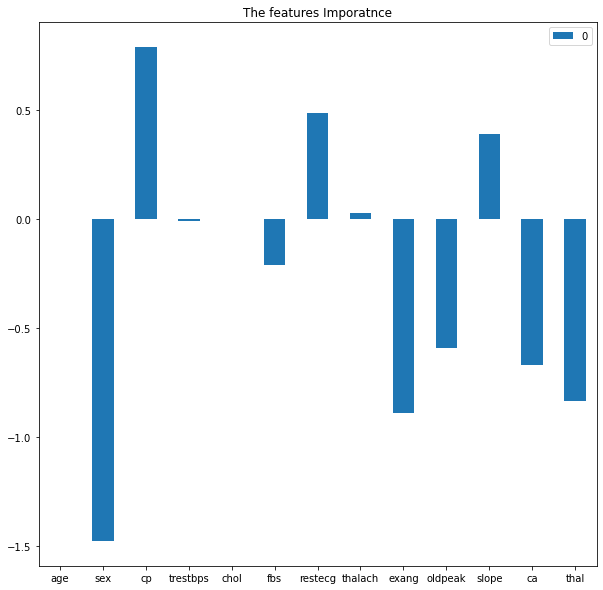

In [71]:
feature_vis.T.plot(kind="bar",title="The features Imporatnce",figsize=(10,10))

plt.xticks(rotation=0)